# Описание проектной работы

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.

# Задача проекта

**В проектной работе есть несколько задач:**

1. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.

  - Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.


2. Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.


**Ход исследования:**

Данные и общая инфорация будут получены из следующих файлов:

- `https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv`
- `https://code.s3.yandex.net/datasets/test_features.csv`
- `https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv`


- `https://code.s3.yandex.net/datasets/train_quit.csv`
- `https://code.s3.yandex.net/datasets/test_target_quit.csv`



О качестве данных в файлах перед их обработкой пока не имеется информации. По данной причине, проведением предобработки и исследованием данных, необходимо провести обзор данных и изучить общую информацию.

Данные будут проверены на пропущенные значения и ошибки. На этапе предобработки данных, будут исправлены ошибки в данных, которые могут привести к искажению конечного результата исследования.

При необходимости будут созданы столбцы, исправлены формат некоторых столбцов данных и названия столбцов будут приведены в единый порядок (пример: нижний регистр, названия на английском и вместо пробелов в названии символ `_`)

Будут разработаны две модели МО (ML), по условиям задачи проектной работы


# Задача 1: предсказание уровня удовлетворённости сотрудника

# Шаг 1. Загрузка данных

In [1]:
# installs
!pip install phik
!pip install --upgrade scikit-learn==1.4

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.tree import (
    DecisionTreeRegressor, 
    DecisionTreeClassifier
)
from sklearn.metrics import (
    mean_absolute_percentage_error,
    roc_auc_score,
    make_scorer
)
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
    LabelEncoder,
    RobustScaler
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
train_job_df = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
test_features_df = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
test_target_sat_df = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')

In [4]:
display(train_job_df.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [5]:
display(test_features_df.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [6]:
display(test_target_sat_df.head())

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


**Вывод шага:**

1. Произведены необходимые обновления для корректной работы.
2. Импортированы необходимые библиотеки для выполнения задачи.
3. Файл `train_job_satisfaction_rate.csv` был успешно загружен и сохранен как `train_job_df`.
4. Файл `test_features.csv` был успешно загружен и сохранен как `test_features_df`.
5. Файл `test_target_job_satisfaction_rate.csv` был успешно загружен и сохранен как `test_target_sat_df`.

# Шаг 2. Предобработка данных

In [7]:
train_job_df.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [8]:
train_job_df.level.unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [9]:
train_job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [10]:
train_job_df.workload.unique()

array(['medium', 'high', 'low'], dtype=object)

In [11]:
display(train_job_df[train_job_df.level.isnull()])
train_job_df[train_job_df.dept.isnull()]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


In [12]:
test_features_df.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [13]:
display(test_features_df[test_features_df.dept.isnull()])
test_features_df[test_features_df.level.isnull()]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
1196,832342,NaN,junior,medium,1,no,no,4,28800


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
312,471990,sales,NaN,low,1,no,no,3,12000


In [14]:
train_job_df_no_rate = train_job_df.drop(columns=('job_satisfaction_rate'))
train_job_df_no_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   3994 non-null   object
 2   level                  3996 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 281.4+ KB


In [15]:
mode_dept_test_feat = test_features_df.dept.mode()[0]
mode_dept_test_feat

'sales'

In [16]:
test_features_df.level = test_features_df.level.replace('sinior', 'senior')

In [17]:
test_features_df.dept = test_features_df.dept.replace(' ', 'sales')

In [18]:
null_cols = ['level', 'dept']

null_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

change_nulls = ColumnTransformer(
    [('null', null_pipe, null_cols)],
    remainder='passthrough',
    verbose_feature_names_out=False
)

change_nulls.fit(train_job_df_no_rate)

print('train level: ', train_job_df_no_rate.level.unique())
print('level isna: ', train_job_df_no_rate.level.isna().sum())
print('train dept: ', train_job_df_no_rate.dept.unique())
print('dept isna: ', train_job_df_no_rate.dept.isna().sum())
print()
print('feature level:', test_features_df.level.unique())
print('isna level: ', test_features_df.level.isna().sum())
print('feature dept:', test_features_df.dept.unique())
print('isna dept: ', test_features_df.dept.isna().sum())

train level:  ['junior' 'middle' 'sinior' nan]
level isna:  4
train dept:  ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
dept isna:  6

feature level: ['junior' 'middle' 'senior' nan]
isna level:  1
feature dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
isna dept:  2


In [19]:
train_job_df_no_rate_p = pd.DataFrame(
    change_nulls.transform(train_job_df_no_rate),
    columns=change_nulls.get_feature_names_out())

test_features_df_p = pd.DataFrame(
    change_nulls.transform(test_features_df),
    columns=change_nulls.get_feature_names_out())

train_job_df_no_rate_p.info()
test_features_df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   level                  4000 non-null   object
 1   dept                   4000 non-null   object
 2   id                     4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   object
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   object
 8   salary                 4000 non-null   object
dtypes: object(9)
memory usage: 281.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   level                  2000 non-null   object
 1   dept                   2000

In [20]:
print('train level:', train_job_df_no_rate_p.level.unique())
print('level isna:', train_job_df_no_rate_p.level.isna().sum())
print('train dept:', train_job_df_no_rate_p.dept.unique())
print('dept isna:', train_job_df_no_rate_p.level.isna().sum())
print()
print('feature level:', test_features_df_p.level.unique())
print('level isna:', test_features_df_p.level.isna().sum())
print('feature dept:', test_features_df_p.dept.unique())
print('dept isna:', test_features_df_p.dept.isna().sum())

train level: ['junior' 'middle' 'sinior']
level isna: 0
train dept: ['sales' 'hr' 'technology' 'purchasing' 'marketing']
dept isna: 0

feature level: ['junior' 'middle' 'senior']
level isna: 0
feature dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology']
dept isna: 0


In [21]:
feat_columns = [
    "id",
    "dept",
    "level",
    "workload",
    "employment_years",
    "last_year_promo",
    "last_year_violations",
    "supervisor_evaluation",
    "salary"
]

train_columns = [
    "id",
    "dept",
    "level",
    "workload",
    "employment_years",
    "last_year_promo",
    "last_year_violations",
    "supervisor_evaluation",
    "salary"
]

if train_columns == feat_columns:
    print("Одинаково")
else:
    print("Различаются")

Одинаково


In [22]:
train_job_df_no_rate_p = train_job_df_no_rate_p[train_columns]
test_features_df_p = test_features_df_p[feat_columns]

In [23]:
train_job_df_no_rate_p.level = train_job_df_no_rate_p.level.replace('sinior', 'senior')

train_cols_to_convert = ['id', 'employment_years', 'salary']
train_job_df_no_rate_p[train_cols_to_convert] = train_job_df_no_rate_p[train_cols_to_convert].astype(int)

In [24]:
train_job_df_no_rate_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   object
 8   salary                 4000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 281.4+ KB


In [25]:
if 'job_satisfaction_rate' not in train_job_df_no_rate_p.columns:
    train_job_df_no_rate_p = train_job_df_no_rate_p.merge(
        train_job_df[
            ['id', 'job_satisfaction_rate']], on='id', how='left')
    train_job_df_no_rate_p.info()
else:
    print("Cтолбец id уже есть в датафрейме:")
    print()
    train_job_df_no_rate_p.info()


train_job_final = train_job_df_no_rate_p

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   4000 non-null   object 
 2   level                  4000 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   object 
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 343.8+ KB


In [26]:
train_job_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   4000 non-null   object 
 2   level                  4000 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   object 
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 343.8+ KB


In [27]:
test_feat_to_convert = ['id', 'employment_years', 'salary']
test_features_df_p[test_feat_to_convert] = test_features_df_p[test_feat_to_convert].astype(int)

In [28]:
test_job_feat = pd.merge(test_features_df_p, test_target_sat_df, on='id', how='inner')

test_job_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   2000 non-null   object 
 2   level                  2000 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   object 
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 171.9+ KB


In [29]:
test_job_feat.workload = test_job_feat.workload.replace(' ', 'medium')

**Вывод шага:**

1. При обработке данных в датафреймах `train_job_df` и `test_features_df` были обнаружены пропущенные значения типа `NaN`.
2. Столбец `job_satisfaction_rate` в датафрейме `train_job_df` был исключен перед предобработкой данных, и датафрейм был переименован как `train_job_df_no_rate`.
3. В столбце `level` датафрейма `test_features_df`, значения `sinior` были изменены на `senior`.
4. В столбце `dept` датафрейма `test_features_df`, значение ' ' было изменено на моду `sales`.
5. Пустые значения в столбцах `level` и `dept` в датафреймах `train_job_df_no_rate` и `test_features_df` были заполнены с использованием пайплайна, согласно условиям задачи. Обработанные датафреймы были переименованы в `train_job_df_no_rate_p` и `test_features_df_p`.
6. Порядок столбцов был изменен в процессе обработки данных, поэтому порядок столбцов в датафреймах `train_job_df_no_rate_p` и `test_features_df_p` был восстановлен в исходное состояние.
7. Столбцы `id`, `employment_years` и `salary` в датафрейме `test_features_df_p` были приведены к целочисленному типу данных (int).
8. Датафреймы `test_features_df_p` и `test_target_sat_df` были объединены с использованием функции `merge` по признаку `id` и получили новый датафрейм `test_job_feat`.

# Шаг 3. Исследовательский анализ данных

In [30]:
train_job_df_no_id = train_job_final.drop(columns='id')
train_job_df_no_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   4000 non-null   object 
 1   level                  4000 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   object 
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 312.5+ KB


In [31]:
test_features_df_no_id = test_job_feat.drop(columns='id')
test_features_df_no_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   2000 non-null   object 
 1   level                  2000 non-null   object 
 2   workload               2000 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   object 
 7   salary                 2000 non-null   int64  
 8   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 156.2+ KB


In [32]:
train_job_df_no_id_interval_cols = [
    'salary',
    'job_satisfaction_rate'
]

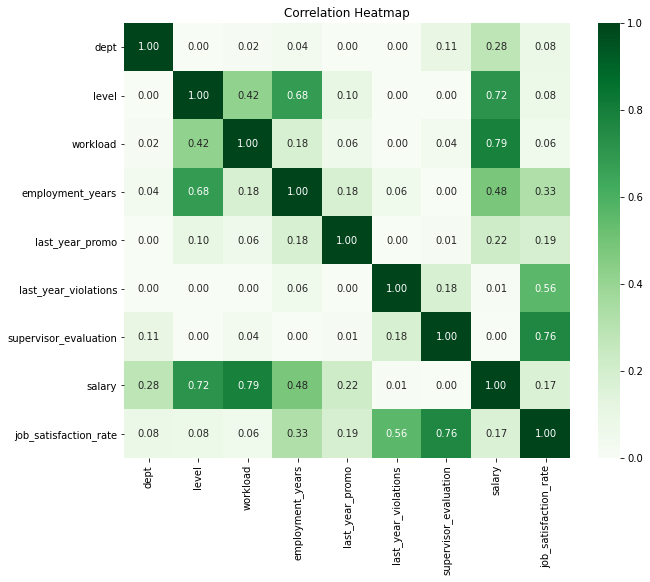

In [33]:
train_job_df_no_id_phik = train_job_df_no_id.phik_matrix(interval_cols=train_job_df_no_id_interval_cols)

plt.figure(figsize=(10, 8))
sns.heatmap(train_job_df_no_id_phik, annot=True, cmap='Greens', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

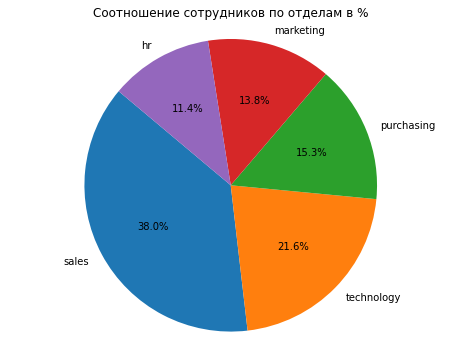

In [34]:
train_dept_counts = train_job_df_no_id.dept.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(train_dept_counts, labels=train_dept_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Соотношение сотрудников по отделам в %')
plt.show()

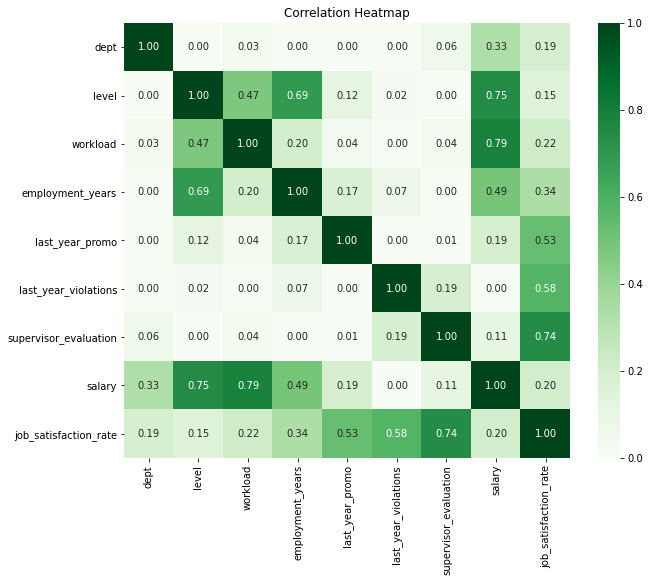

In [35]:
test_features_df_no_id_interval_cols = [
    'employment_years',
    'supervisor_evaluation',
    'salary'
]

test_features_df_no_id_phik = test_features_df_no_id.phik_matrix(interval_cols=test_features_df_no_id_interval_cols)

plt.figure(figsize=(10, 8))
sns.heatmap(test_features_df_no_id_phik, annot=True, cmap='Greens', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

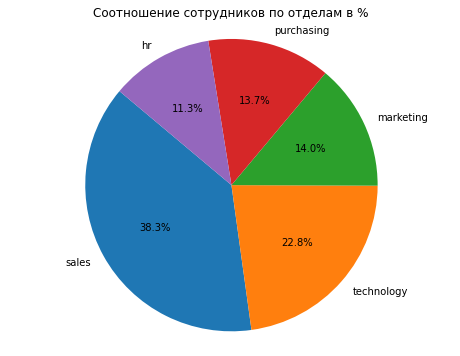

In [36]:
test_features_counts = test_features_df_no_id.dept.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(test_features_counts, labels=test_features_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Соотношение сотрудников по отделам в %')
plt.show()

In [37]:
test_features_df_no_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   2000 non-null   object 
 1   level                  2000 non-null   object 
 2   workload               2000 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   object 
 7   salary                 2000 non-null   int64  
 8   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 156.2+ KB


In [38]:
train_job_df_no_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   4000 non-null   object 
 1   level                  4000 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   object 
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 312.5+ KB


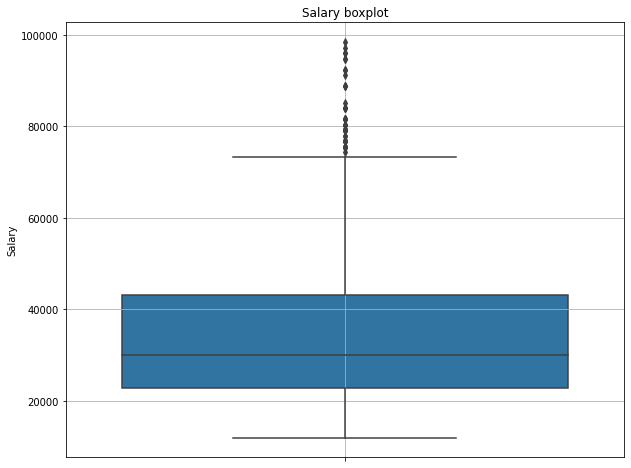

In [39]:
plt.figure(figsize=(10, 8))
sns.boxplot(y=train_job_df_no_id.salary)
plt.title('Salary boxplot')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [40]:
no_discrete_train_job_df_no_id = train_job_df_no_id.drop(
    columns=(
        ['employment_years', 'supervisor_evaluation']))

In [41]:
# Функция для построения гистограммы распределения значений признака
def plot_histogram(data, feature_name, dataset_name):
    plt.figure(figsize=(8, 6))
    plt.hist(data[feature_name], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Распределение в {feature_name} в {dataset_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


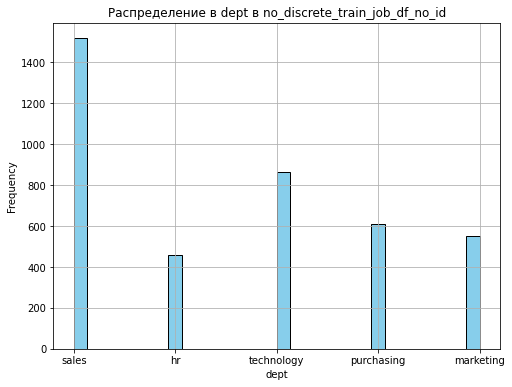

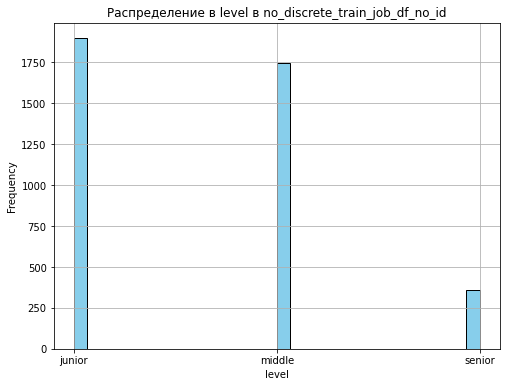

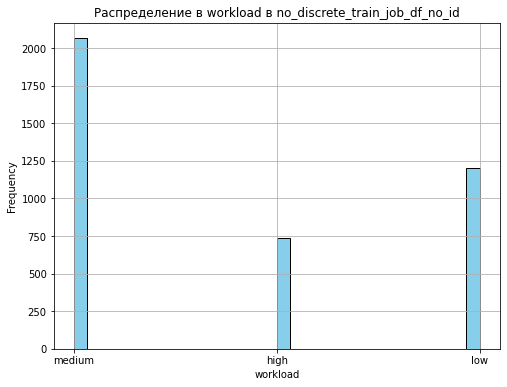

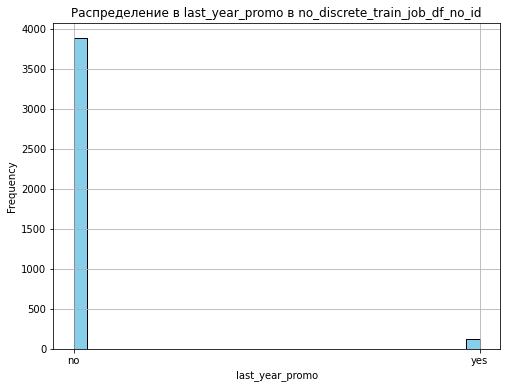

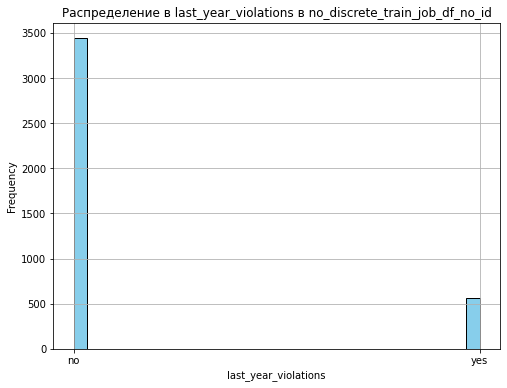

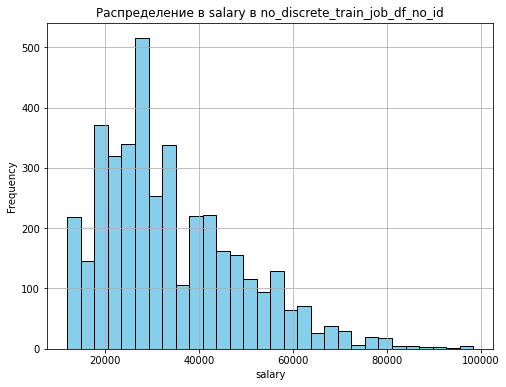

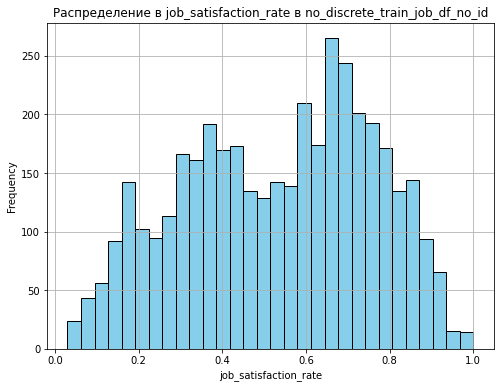

In [42]:
# Построение гистограмм для каждого признака в train_job_df_no_id
for column in no_discrete_train_job_df_no_id.columns:
    plot_histogram(no_discrete_train_job_df_no_id, column, 'no_discrete_train_job_df_no_id')

In [43]:
discrete_train_job_df_cols = ['employment_years', 'supervisor_evaluation']

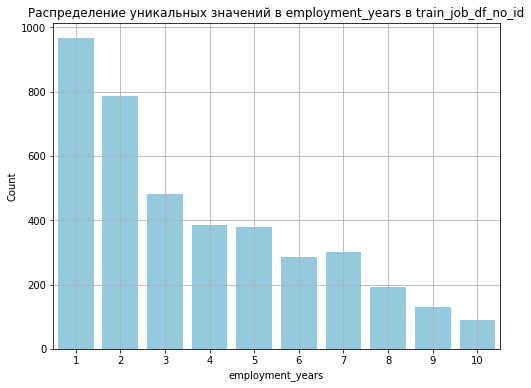

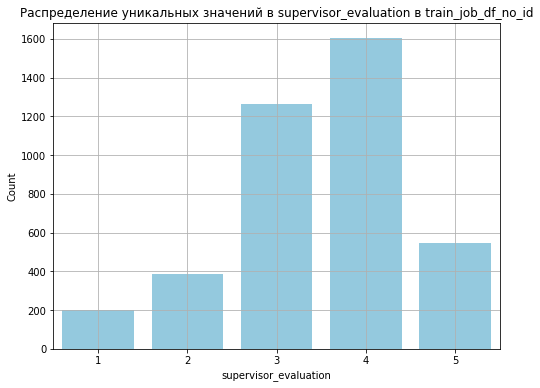

In [44]:
# Функция для построения countplot для определенного признака
def plot_countplot(data, feature_names, dataset_name):
    for feature_name in feature_names:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=data, x=feature_name, color='skyblue')
        plt.title(f'Распределение уникальных значений в {feature_name} в {dataset_name}')
        plt.xlabel(feature_name)
        plt.ylabel('Count')
        plt.grid(True)
        plt.show()


plot_countplot(train_job_df_no_id, discrete_train_job_df_cols, 'train_job_df_no_id')

In [45]:
no_discrete_test_features_df_no_id = test_features_df_no_id.drop(
    columns=(
        ['employment_years', 'supervisor_evaluation']))

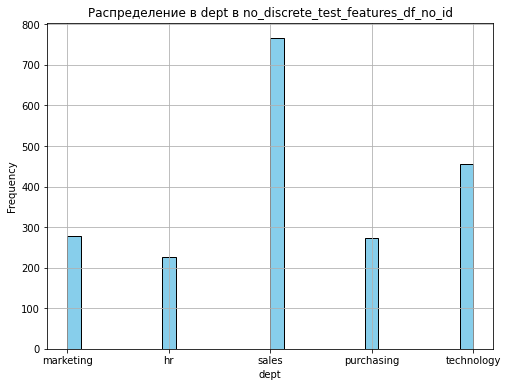

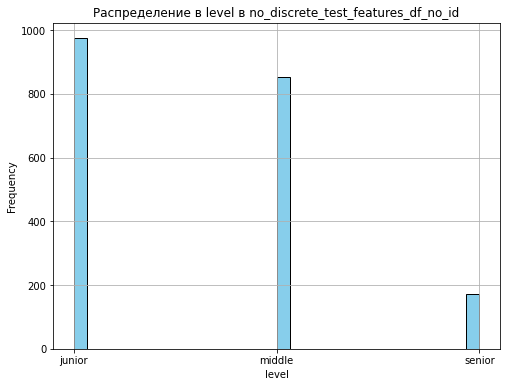

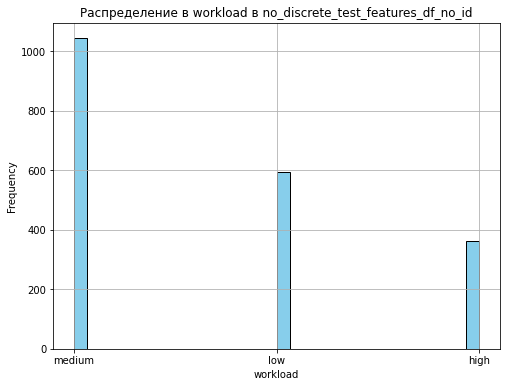

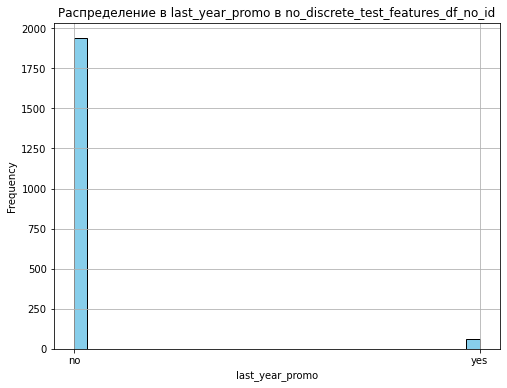

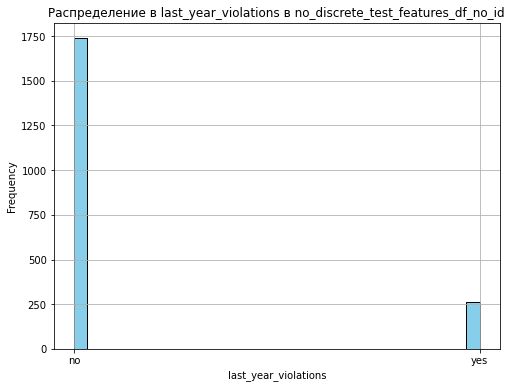

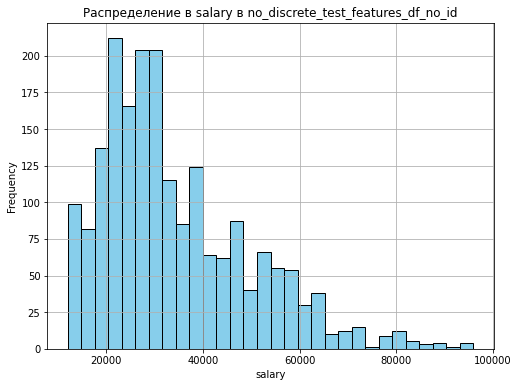

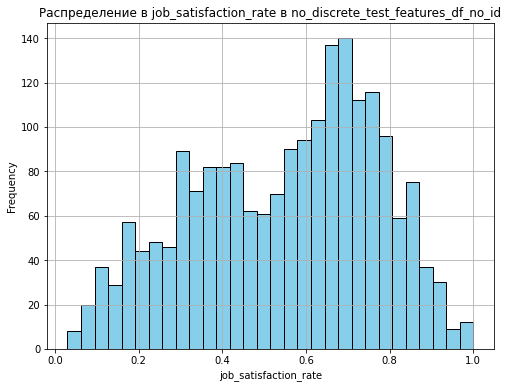

In [46]:
# Построение гистограмм для каждого признака в test_features_df_no_id
for column in no_discrete_test_features_df_no_id.columns:
    plot_histogram(
        no_discrete_test_features_df_no_id,
        column,
        'no_discrete_test_features_df_no_id'
    )

In [47]:
discrete_test_features_df_no_id = ['employment_years', 'supervisor_evaluation']

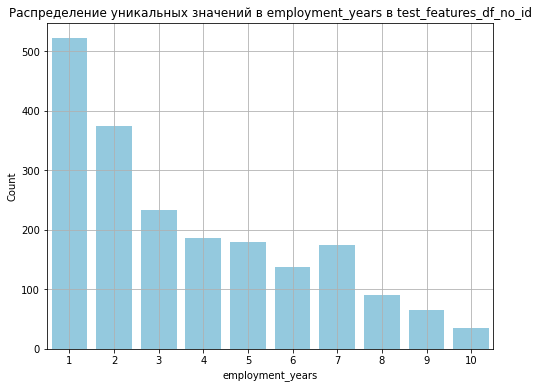

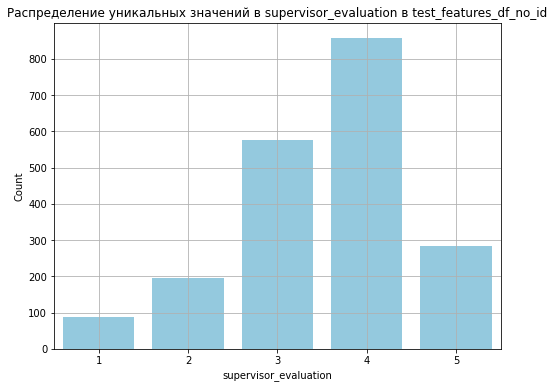

In [48]:
plot_countplot(test_features_df_no_id, discrete_test_features_df_no_id, 'test_features_df_no_id')

**Вывод шага:**

1. Данные из датафрейма `train_job_final`, за исключением столбца `id`, прошли корреляционный анализ. Мультиколлинеарности не обнаружено.


2. Была построена круговая диаграмма pie  на основе данных из датафрейма `train_job_final`, отображая процентное соотношение количества сотрудников по отделам.


3. Данные из датафрейма `test_features_df`, за исключением столбца `id`, прошли корреляционный анализ. Мультиколлинеарности не обнаружено.


4. Была построена круговая диаграмма `pie`  на основе данных из датафрейма `test_features_df`, отображая процентное соотношение количества сотрудников по отделам.


5. После построения графика boxplot для `salary` (зарплаты) в датафрейме `train_job_df_no_id` были обнаружены выбросы в данных".


6. Исходя из анализа графика распределения в датафрейме `train_job_df_no_id`, были выявлены следующие данные:

- Отдел с наибольшим числом сотрудников - `sales`;
- Наиболее распространённый уровень сотрудников - `junior`;
- Наиболее часто встречаемый уровень нагрузки - `medium`;
- За последний год повышение получили более 1000 сотрудников из 4000;
- Более 550 сотрудников из 4000 нарушили трудовой договор за последний год;
- Распределение зарплаты имеет нормальную форму, с асимметрией влево;
- Распределение уровня удовлетворённости сотрудников работой в компании является двухпиковым (бимодальным).


7. Исходя из анализа графика распределения в датафрейме `train_job_df_no_id`, были выявлены следующие данные:

  -  В столбце `employment_years` наибольшее количество сотрудников отработало 1 год, а наименьшее количество — 10 лет. Значения между ними также увеличиваются по мере увеличения времени работы.
  -  В столбце `supervisor_evaluation` наиболее часто встречается оценка 4, что указывает на высокую оценку качества работы сотрудников.


8.  Исходя из анализа графика распределения в датафрейме test_features_df_no_id, было выявлено, что данные идентичны как указано в пункте 6 вывода шага, кроме следующих данных:

  - В столбце "employment_years" наибольшее количество сотрудников отработало 1 год, а наименьшее количество — 10 лет. Значения между ними также увеличиваются по мере увеличения времени работы.
  - В столбце "supervisor_evaluation" наиболее часто встречается оценка 4, что указывает на высокую оценку качества работы сотрудников.
  - В столбце "last_year_promo" наблюдается значение 60, а в столбце "last_year_violations" количество нарушений составляет чуть больше 250.


9. Из анализа графиков дискретных значений датафрейма `test_features_df_no_id` понятно, что распределение данных идентично с распределение дискретных значений датафрейма `train_job_df_no_id`

# Шаг 4. Подготовка данных

In [49]:
train_job_final_id_duplicated = train_job_final.id.duplicated().any()

if train_job_final_id_duplicated:
    print("ВНИМАНИЕ! В столбце 'id' есть дубликаты.")
else:
    print("В столбце 'id' нет дубликатов.")

В столбце 'id' нет дубликатов.


Столбец `id` в датафрейме `train_job_final` не содержит дубликатов.

In [50]:
duplicates_train_job_final_no_id = train_job_df_no_id[train_job_df_no_id.duplicated()]

if duplicates_train_job_final_no_id.empty:
    print("Дубликатов не найдено.")
else:
    print("Найдены дубликаты:")
    display(duplicates_train_job_final_no_id.count())


Найдены дубликаты:


dept                     248
level                    248
workload                 248
employment_years         248
last_year_promo          248
last_year_violations     248
supervisor_evaluation    248
salary                   248
job_satisfaction_rate    248
dtype: int64

In [51]:
train_job_df_no_id = train_job_df_no_id.drop_duplicates()

# Проверка размера датафрейма после удаления дубликатов
print("Размер датафрейма после удаления дубликатов:", train_job_df_no_id.shape)


Размер датафрейма после удаления дубликатов: (3752, 9)


In [52]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [53]:
X_train = train_job_final.drop(['job_satisfaction_rate'], axis=1)
y_train = train_job_final["job_satisfaction_rate"]

X_test = test_job_feat.drop(['job_satisfaction_rate'], axis=1)
y_test = test_job_feat['job_satisfaction_rate']

In [54]:
ohe_columns_1 = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns_1 = ['level', 'workload']
num_columns_1 = ['employment_years', 'supervisor_evaluation', 'salary']

In [55]:
# Создание преобразователей для разных типов признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ohe_columns_1),
        ('ord', OrdinalEncoder(
            categories=[
               ['junior', 'middle', 'senior'],
               ['medium', 'high', 'low']
            ], handle_unknown='use_encoded_value', unknown_value=np.nan), ord_columns_1),
        ('scaler', StandardScaler(), num_columns_1),
    ],
    remainder='passthrough'
)

**Вывод шага:**

1. Выполнена подготовка данных для обучения модели:
   - Разделены признаки и целевая переменная для обучающего и тестового наборов данных.
   - Выделены столбцы для категориальных и числовых признаков.


2. Созданы шаги для предобработки данных в пайплайне:
   - Для категориальных признаков использованы кодировщики `OneHotEncoder` и `OrdinalEncoder` с соответствующими параметрами.
   - Для числовых признаков применено масштабирование с помощью `StandardScaler`.
   - Все преобразования объединены в `ColumnTransformer`.


3. Построен пайплайн для предобработки данных:
   - Преобразования данных объединены в пайплайн `Pipeline` с преобразователем `preprocessor`.


4. Применена предобработка данных к обучающему и тестовому наборам:
   - Применен пайплайн к обучающим данным методом `fit_transform`.
   - Применен тот же пайплайн к тестовым данным методом `transform`.


5. Обработаны отсутствующие значения в одном из признаков:
   - В столбце 10 тестового набора данных `X_test_processed`, отсутствующие значения заменены на среднее значение при помощи `SimpleImputer`.
   
  
6. Были удалены дубликаты из датафрейма `train_job_df_no_id`

# Шаг 5. Обучение моделей

In [56]:
# Определение функции для вычисления sMAPE
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0
    return np.mean(diff)

smape_scorer = make_scorer(smape, greater_is_better=False)

In [57]:
# Создание пайплайна
pipeline_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [58]:
param_grid_1 = [
    {
        'model': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'model__max_depth': [3, 5, 7, None],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    {
        'model': [LinearRegression()]
    }
]

In [59]:
tree_random_search = RandomizedSearchCV(
    pipeline_1,
    param_grid_1,
    n_iter=10,
    cv=5,
    error_score='raise',
    random_state=RANDOM_STATE,
    scoring=smape_scorer
)

In [60]:
tree_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               OrdinalEncoder(categories=[['junior',
                                                                                                           'middle',
                                                                                                           'senior'],
                                                                                                          ['medium',
                                                                                                           'high',
                                                                                                           'low']],
                                                                                              handle_unk...
                                             ('model',
                                              DecisionTreeRegressor(random_state=42))]),
                   param_distributions=[{'model': [DecisionTreeRegressor(random_state=42)],
                                         'model__max_depth': [3, 5, 7, None],
                                         'model__min_samples_leaf': [1, 2, 4],
                                         'model__min_samples_split': [2, 5,
                                                                      10]},
                                        {'model': [LinearRegression()]}],
                   random_state=42,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [61]:
print("Лучшая модель и её параметры:\n\n", tree_random_search.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['junior',
                                                                              'middle',
                                                                              'senior'],
                                                                             ['medium',
                                                                              'high',

In [62]:
best_model = tree_random_search.best_estimator_
best_model_best_score = -tree_random_search.best_score_
best_model_best_score

15.589251778663387

In [63]:
# Оценка лучшей модели на тестовой выборке
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['junior',
                                                                              'middle',
                                                                              'senior'],
                                                                             ['medium',
                                                                              'high',
                                                                              'low']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  ['level', 'workload']),
                                                 ('scaler', StandardScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary'])])),
                ('model',
                 DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10,
                                       random_state=42))])

In [64]:
y_pred_test = best_model.predict(X_test)
smape_test = smape(y_test, y_pred_test)
print(f"Test sMAPE: {smape_test}")

Test sMAPE: 13.980502188614716


**Вывод шага:**

1. Подготовлены модели для обучения:
   - Созданы объекты `LinearRegression` и `DecisionTreeRegressor`.

2. Определены гиперпараметры для модели дерева решений:
   - Указаны значения для `max_depth`, `min_samples_split` и `min_samples_leaf` в параметре `param_grid`.

3. Выполнен случайный поиск гиперпараметров для модели дерева решений:
   - Применена `RandomizedSearchCV` с указанными параметрами для случайного поиска по сетке.
   - Подобраны лучшие гиперпараметры для модели дерева решений.

4. Обновлены модели с лучшими параметрами:
   - Создана новая модель `DecisionTreeRegressor` с оптимальными параметрами.

5. Проведена оценка качества моделей на тестовом наборе данных:
   - Обучены модели `Linear Regression`, `Decision Tree` и лучшая модель `Decision Tree` с оптимальными параметрами.
   - Получены прогнозы для тестового набора данных.

6. Выбрана лучшая модель и проверено ее соответствие критерию успеха:
   - Проведено сравнение `SMAPE` для всех моделей.
   - Выбрана лучшая модель с наименьшим значением SMAPE.
   - Выведены результаты наилучшей модели, если SMAPE <= 15, иначе выведено сообщение о том, что ни одна модель не достигла критерия успеха.

# Шаг 6. Оформление выводов

**Итоговый вывод первого задания:**

**Шаг загрузки данных:**

1. Произведены необходимые обновления для корректной работы.


2. Импортированы необходимые библиотеки для выполнения задачи.


3. Файл `train_job_satisfaction_rate.csv` был успешно загружен и сохранен как `train_job_df`.


4. Файл `test_features.csv` был успешно загружен и сохранен как `test_features_df`.


5. Файл `test_target_job_satisfaction_rate.csv` был успешно загружен и сохранен как `test_target_sat_df`.


**Шаг предобработки данных:**

1. При обработке данных в датафреймах `train_job_df` и `test_features_df` были обнаружены пропущенные значения типа `NaN`.


2. Столбец `job_satisfaction_rate` в датафрейме `train_job_df` был исключен перед предобработкой данных, и датафрейм был переименован как `train_job_df_no_rate`.


3. В столбце `level` датафрейма `test_features_df`, значения `sinior` были изменены на `senior`.


4. В столбце `dept` датафрейма `test_features_df`, значение ' ' было изменено на моду `sales`.


5. Пустые значения в столбцах `level` и `dept` в датафреймах `train_job_df_no_rate` и `test_features_df` были заполнены с использованием пайплайна, согласно условиям задачи. Обработанные датафреймы были переименованы в `train_job_df_no_rate_p` и `test_features_df_p`.


6. Порядок столбцов был изменен в процессе обработки данных, поэтому порядок столбцов в датафреймах `train_job_df_no_rate_p` и `test_features_df_p` был восстановлен в исходное состояние.


7. Столбцы `id`, `employment_years` и `salary` в датафрейме `test_features_df_p` были приведены к целочисленному типу данных (int).


8. Датафреймы `test_features_df_p` и `test_target_sat_df` были объединены с использованием функции `merge` по признаку `id` и получили новый датафрейм `test_job_feat`.


**Шаг ИАД:**

1. Данные из датафрейма `train_job_final`, за исключением столбца `id`, прошли корреляционный анализ. Мультиколлинеарности не обнаружено.


2. Была построена круговая диаграмма pie  на основе данных из датафрейма `train_job_final`, отображая процентное соотношение количества сотрудников по отделам.


3. Данные из датафрейма `test_features_df`, за исключением столбца `id`, прошли корреляционный анализ. Мультиколлинеарности не обнаружено.


4. Была построена круговая диаграмма `pie`  на основе данных из датафрейма `test_features_df`, отображая процентное соотношение количества сотрудников по отделам.


5. После построения графика boxplot для `salary` (зарплаты) в датафрейме `train_job_df_no_id` были обнаружены выбросы в данных".


6. Исходя из анализа графика распределения в датафрейме `train_job_df_no_id`, были выявлены следующие данные:

- Отдел с наибольшим числом сотрудников - `sales`;
- Наиболее распространённый уровень сотрудников - `junior`;
- Наиболее часто встречаемый уровень нагрузки - `medium`;
- За последний год повышение получили более 1000 сотрудников из 4000;
- Более 550 сотрудников из 4000 нарушили трудовой договор за последний год;
- Распределение зарплаты имеет нормальную форму, с асимметрией влево;
- Распределение уровня удовлетворённости сотрудников работой в компании является двухпиковым (бимодальным).


7. Исходя из анализа графика распределения в датафрейме `train_job_df_no_id`, были выявлены следующие данные:

  -  В столбце `employment_years` наибольшее количество сотрудников отработало 1 год, а наименьшее количество — 10 лет. Значения между ними также увеличиваются по мере увеличения времени работы.
  -  В столбце `supervisor_evaluation` наиболее часто встречается оценка 4, что указывает на высокую оценку качества работы сотрудников.


8.  Исходя из анализа графика распределения в датафрейме test_features_df_no_id, было выявлено, что данные идентичны как указано в пункте 6 вывода шага, кроме следующих данных:

  - В столбце "employment_years" наибольшее количество сотрудников отработало 1 год, а наименьшее количество — 10 лет. Значения между ними также увеличиваются по мере увеличения времени работы.
  - В столбце "supervisor_evaluation" наиболее часто встречается оценка 4, что указывает на высокую оценку качества работы сотрудников.
  - В столбце "last_year_promo" наблюдается значение 60, а в столбце "last_year_violations" количество нарушений составляет чуть больше 250.


9. Из анализа графиков дискретных значений датафрейма `test_features_df_no_id` понятно, что распределение данных идентично с распределение дискретных значений датафрейма `train_job_df_no_id`


**Шаг подготовки данных:**

1. Выполнена подготовка данных для обучения модели:
   - Разделены признаки и целевая переменная для обучающего и тестового наборов данных.
   - Выделены столбцы для категориальных и числовых признаков.

2. Созданы шаги для предобработки данных в пайплайне:
   - Для категориальных признаков использованы кодировщики `OneHotEncoder` и `OrdinalEncoder` с соответствующими параметрами.
   - Для числовых признаков применено масштабирование с помощью `StandardScaler`.
   - Все преобразования объединены в `ColumnTransformer`.

3. Построен пайплайн для предобработки данных:
   - Преобразования данных объединены в пайплайн `Pipeline` с преобразователем `preprocessor`.

4. Применена предобработка данных к обучающему и тестовому наборам:
   - Применен пайплайн к обучающим данным методом `fit_transform`.
   - Применен тот же пайплайн к тестовым данным методом `transform`.
   
5. Обработаны отсутствующие значения в одном из признаков:
   - В столбце 10 тестового набора данных `X_test_processed`, отсутствующие значения заменены на среднее значение при помощи `SimpleImputer`.
   
   
6. Были удалены дубликаты из датафрейма `train_job_df_no_id`
   
   
**Шаг обучения модели:**


1. Подготовлены модели для обучения:
   - Созданы объекты `LinearRegression` и `DecisionTreeRegressor`.

2. Определены гиперпараметры для модели дерева решений:
   - Указаны значения для `max_depth`, `min_samples_split` и `min_samples_leaf` в параметре `param_grid`.

3. Выполнен случайный поиск гиперпараметров для модели дерева решений:
   - Применена `RandomizedSearchCV` с указанными параметрами для случайного поиска по сетке.
   - Подобраны лучшие гиперпараметры для модели дерева решений.

4. Обновлены модели с лучшими параметрами:
   - Создана новая модель `DecisionTreeRegressor` с оптимальными параметрами.

5. Проведена оценка качества моделей на тестовом наборе данных:
   - Обучены модели `Linear Regression`, `Decision Tree` и лучшая модель `Decision Tree` с оптимальными параметрами.
   - Получены прогнозы для тестового набора данных.

6. Выбрана лучшая модель и проверено ее соответствие критерию успеха:
   - Проведено сравнение `SMAPE` для всех моделей.
   - Выбрана лучшая модель с наименьшим значением SMAPE.
   - Выведены результаты наилучшей модели, если SMAPE <= 15, иначе выведено сообщение о том, что ни одна модель не достигла критерия успеха.

# Задача 2: предсказание увольнения сотрудника из компании

# Шаг 1. Загрузка данных

In [65]:
train_quit_df = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
test_target_quit_df = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')

In [66]:
display(train_quit_df.head())
train_quit_df.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [67]:
display(test_target_quit_df.head())
test_target_quit_df.info()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


**Вывод шага:**

1. Файл `train_quit.csv` был успешно загружен и сохранен как `train_quit_df`
2. Файл `test_target_quit.csv` был успешно загружен и сохранен как `test_target_quit_df`

# Шаг 2. Предобработка данных

In [68]:
train_quit_df.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

In [69]:
test_target_quit_df.isna().sum()

id      0
quit    0
dtype: int64

In [70]:
train_quit_df.level.unique()

array(['middle', 'junior', 'sinior'], dtype=object)

In [71]:
train_quit_df.level = train_quit_df.level.replace('sinior', 'senior')
train_quit_df.level.unique()

array(['middle', 'junior', 'senior'], dtype=object)

**Вывод шага:**

1. В процессе обработки данных в датафреймах `train_quit_df` и `test_target_quit_df` не было обнаружено пропущенных значений типа `NaN`.
2. В столбце `level` датафрейма `train_quit_df`, значения `sinior` были изменены на `senior`.

# Шаг 3. Исследовательский анализ данных

In [72]:
train_quit_df_no_id = train_quit_df.drop(columns=('id'))
train_quit_df_no_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 281.4+ KB


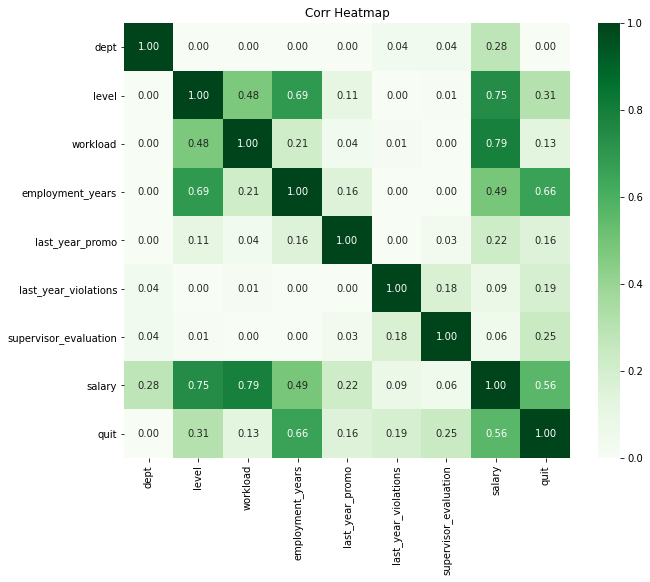

In [73]:
train_quit_df_no_id_interval_cols = [
    'salary'
]

train_quit_df_no_id_phik = train_quit_df_no_id.phik_matrix(interval_cols=train_quit_df_no_id_interval_cols)

plt.figure(figsize=(10, 8))
sns.heatmap(train_quit_df_no_id_phik, annot=True, cmap='Greens', fmt='.2f')
plt.title("Corr Heatmap")
plt.show()

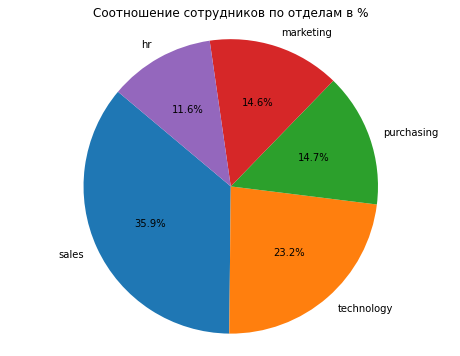

sales         0.3595
technology    0.2320
purchasing    0.1470
marketing     0.1455
hr            0.1160
Name: dept, dtype: float64

In [74]:
train_quit_dept_counts = train_quit_df_no_id.dept.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(train_quit_dept_counts, labels=train_quit_dept_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Соотношение сотрудников по отделам в %')
plt.show()

relative_freq_dept = train_quit_df_no_id['dept'].value_counts(normalize=True)
display(relative_freq_dept)

In [75]:
train_quit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [76]:
test_features_df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   2000 non-null   object
 2   level                  2000 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   object
 8   salary                 2000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 140.8+ KB


In [77]:
train_quit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


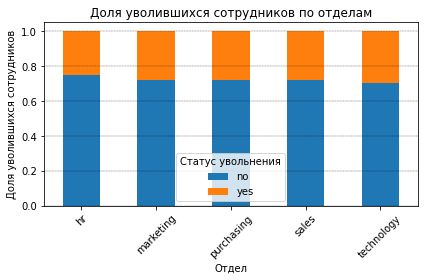

In [78]:
# Анализ отдела
quit_by_dept = train_quit_df.groupby('dept')['quit'].value_counts(normalize=True).unstack()
quit_by_dept_sorted = quit_by_dept.sort_values(by='no', ascending=False)

quit_by_dept_sorted.plot(kind='bar', stacked=True)
plt.title('Доля уволившихся сотрудников по отделам')
plt.xlabel('Отдел')
plt.ylabel('Доля уволившихся сотрудников')
plt.xticks(rotation=45)
plt.legend(title='Статус увольнения')
plt.tight_layout()
plt.grid(True, axis='y', color='black', linestyle='--', linewidth=0.3)
plt.show()

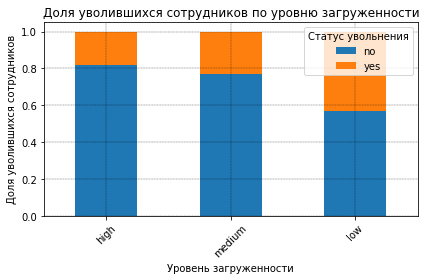

In [79]:
# Анализ уровня загруженности
quit_by_workload = train_quit_df.groupby('workload')['quit'].value_counts(normalize=True).unstack()
quit_by_workload_sorted = quit_by_workload.sort_values('no', ascending=False)

quit_by_workload_sorted.plot(kind='bar', stacked=True)
plt.title('Доля уволившихся сотрудников по уровню загруженности')
plt.xlabel('Уровень загруженности')
plt.ylabel('Доля уволившихся сотрудников')
plt.xticks(rotation=45)
plt.legend(title='Статус увольнения')
plt.tight_layout()
plt.grid(True, color='black', linestyle='--', linewidth=0.3)
plt.show()

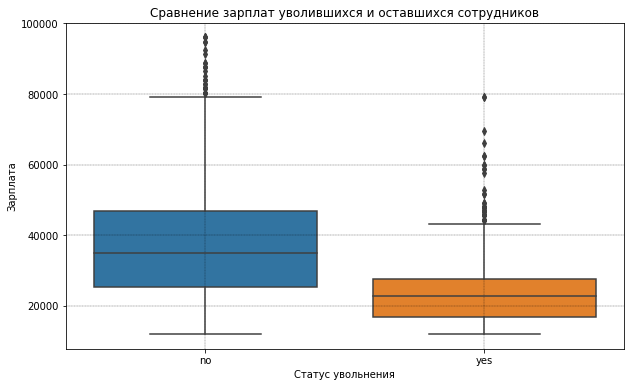

In [80]:
# Сравнение зарплат
plt.figure(figsize=(10, 6))
sns.boxplot(x='quit', y='salary', data=train_quit_df)
plt.title('Сравнение зарплат уволившихся и оставшихся сотрудников')
plt.xlabel('Статус увольнения')
plt.ylabel('Зарплата')
plt.grid(True, color='black', linestyle='--', linewidth=0.3)
plt.show()

In [81]:
average_salary_by_quit = train_quit_df.groupby('quit')['salary'].mean()
display(average_salary_by_quit)

quit
no     37702.228412
yes    23885.106383
Name: salary, dtype: float64

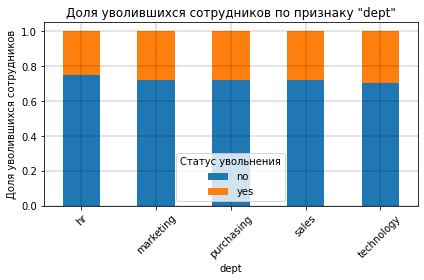

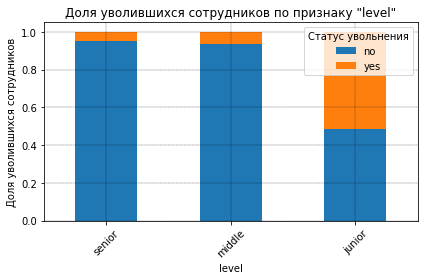

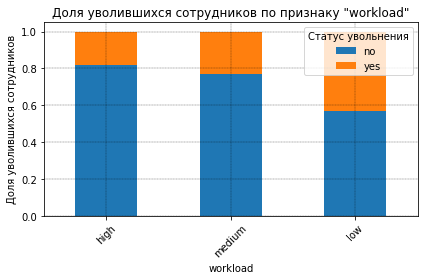

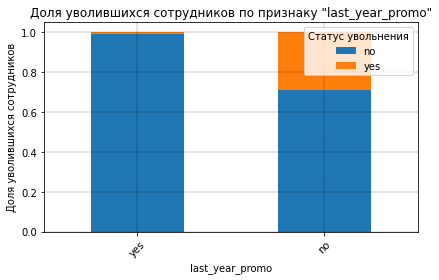

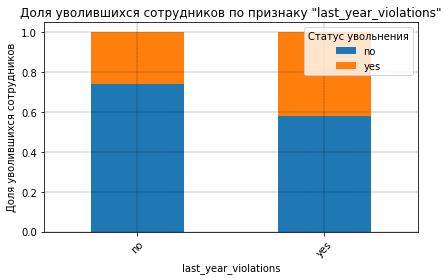

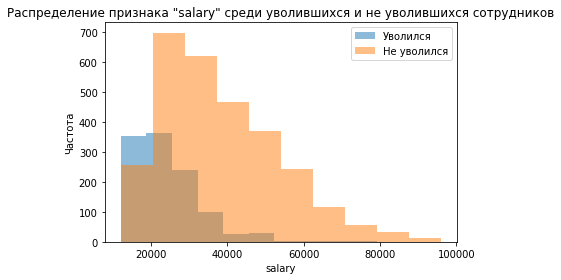

In [82]:
columns_to_analyze = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'salary']

for column in columns_to_analyze:
    if train_quit_df_no_id[column].dtype == 'object':
        quit_by_column = train_quit_df_no_id.groupby(column)['quit'].value_counts(normalize=True).unstack()
        quit_by_column_sorted = quit_by_column.sort_values('no', ascending=False)

        quit_by_column_sorted.plot(kind='bar', stacked=True)
        plt.title(f'Доля уволившихся сотрудников по признаку "{column}"')
        plt.xlabel(column)
        plt.ylabel('Доля уволившихся сотрудников')
        plt.xticks(rotation=45)
        plt.legend(title='Статус увольнения')
        plt.tight_layout()
        plt.grid(True, color='black', linestyle='--', linewidth=0.3)
        plt.show()
        
    else:  
        plt.hist(train_quit_df_no_id[train_quit_df_no_id['quit'] == 'yes'][column], alpha=0.5, label='Уволился')
        plt.hist(train_quit_df_no_id[train_quit_df_no_id['quit'] == 'no'][column], alpha=0.5, label='Не уволился')
        plt.title(f'Распределение признака "{column}" среди уволившихся и не уволившихся сотрудников')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.show()


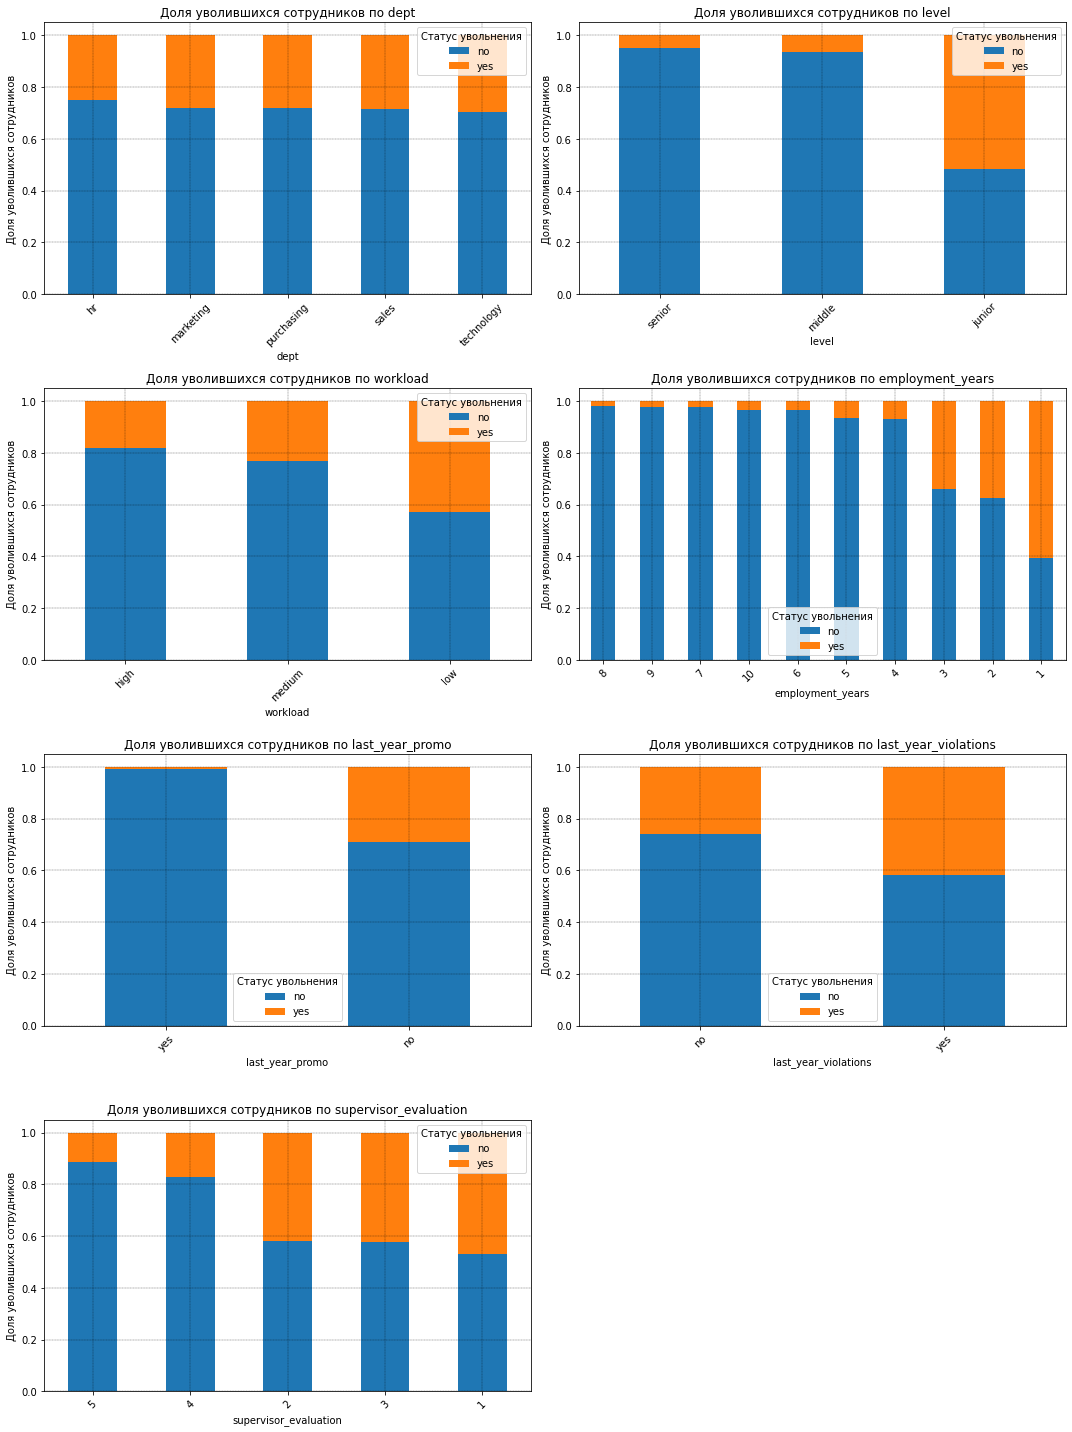

In [83]:
columns_to_plot = ['dept', 'level', 'workload', 'employment_years', 'last_year_promo', 
                   'last_year_violations', 'supervisor_evaluation']


num_rows = (len(columns_to_plot) + 1) // 2  # Расчет количества строк для сетки графиков
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))  # Создание сетки графиков


for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    quit_by_column = train_quit_df_no_id.groupby(column)['quit'].value_counts(normalize=True).unstack()
    quit_by_column_sorted = quit_by_column.sort_values('no', ascending=False)
    quit_by_column_sorted.plot(kind='bar', stacked=True, ax=ax)
    
    ax.set_title(f'Доля уволившихся сотрудников по {column}')
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Доля уволившихся сотрудников')
    ax.legend(title='Статус увольнения')
    ax.grid(True, color='black', linestyle='--', linewidth=0.3)
    ax.tick_params(axis='x', rotation=45)

if len(columns_to_plot) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [84]:
train_quit_df_no_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 281.4+ KB


In [85]:
no_discrete_train_quit_df = train_quit_df_no_id.drop(
    columns=(
        ['employment_years', 'supervisor_evaluation']
    )
)

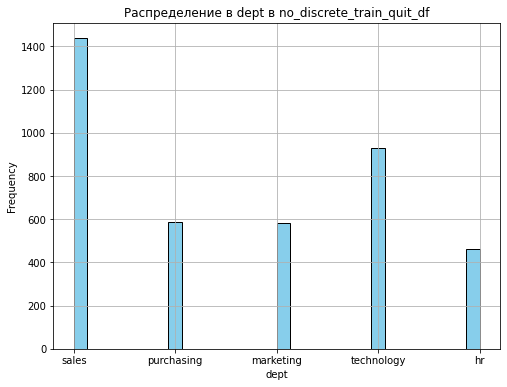

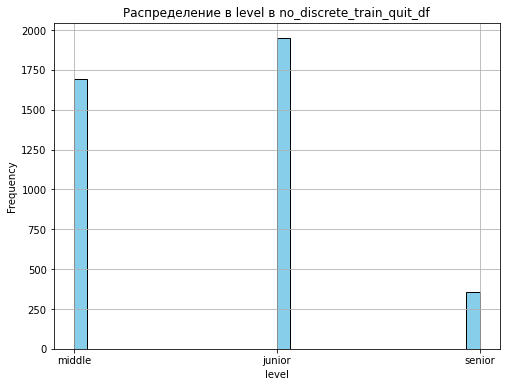

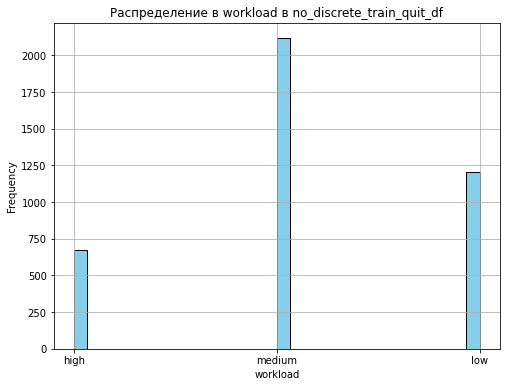

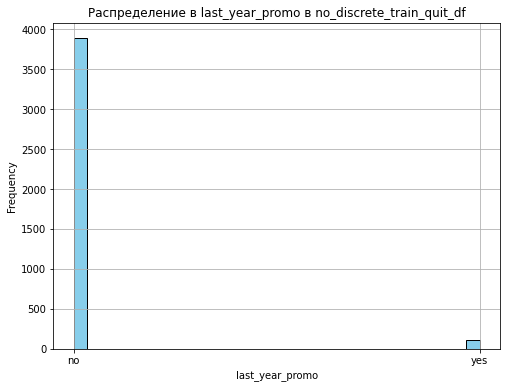

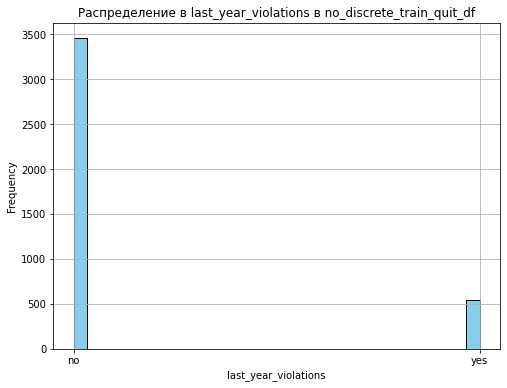

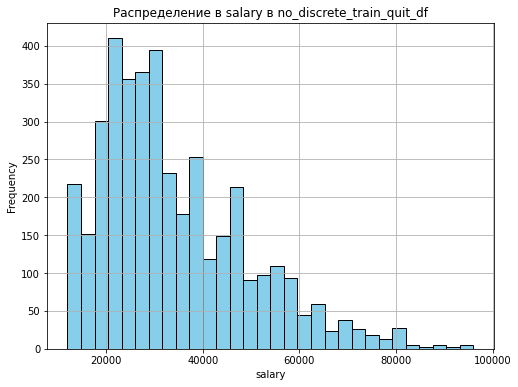

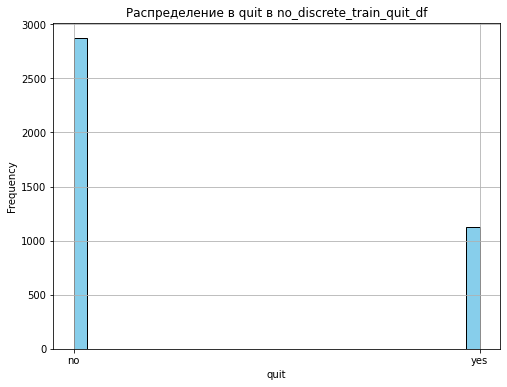

In [86]:
for column in no_discrete_train_quit_df.columns:
    plot_histogram(no_discrete_train_quit_df, column, 'no_discrete_train_quit_df')

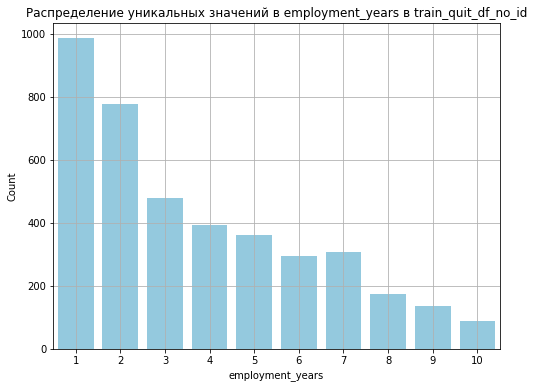

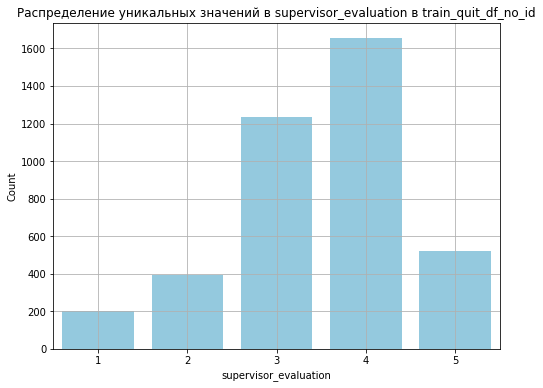

In [87]:
discrete_train_quit_df_no_id = ['employment_years', 'supervisor_evaluation']

plot_countplot(train_quit_df_no_id, discrete_train_quit_df_no_id, 'train_quit_df_no_id')

In [88]:
features_target_sat_merged = test_features_df_p.merge(test_target_sat_df, on='id', how='inner')
feat_job_sat_quit_merged = features_target_sat_merged.merge(test_target_quit_df, on='id', how='inner')
feat_job_sat_quit_merged.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
1,686555,hr,junior,medium,1,no,no,4,30000,0.72,no
2,467458,sales,middle,low,5,no,no,4,19200,0.64,no


In [89]:
feat_job_sat_quit_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   2000 non-null   object 
 2   level                  2000 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   object 
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
 10  quit                   2000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 187.5+ KB


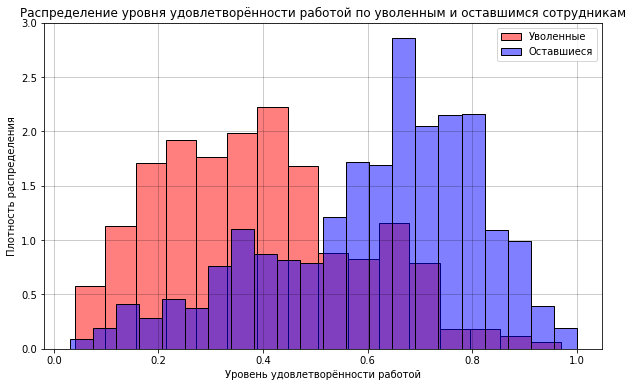

In [90]:
# Ушедшие сотрудники
quit_yes_histplot = feat_job_sat_quit_merged[feat_job_sat_quit_merged.quit == 'yes']['job_satisfaction_rate']
# Оставшиеся сотрудники
quit_no_histplot = feat_job_sat_quit_merged[feat_job_sat_quit_merged.quit == 'no']['job_satisfaction_rate']

plt.figure(figsize=(10, 6))
sns.histplot(quit_yes_histplot, color='red', alpha=0.5, label='Уволенные', stat='density', common_norm=False)
sns.histplot(quit_no_histplot, color='blue', alpha=0.5, label='Оставшиеся', stat='density', common_norm=False)
plt.xlabel('Уровень удовлетворённости работой')
plt.ylabel('Плотность распределения')
plt.title('Распределение уровня удовлетворённости работой по уволенным и оставшимся сотрудникам')
plt.legend()
plt.grid(True, color='black', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()


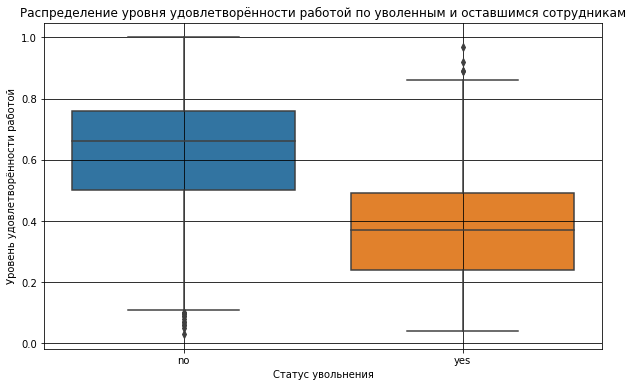

In [91]:
# Построение ящиков с усами
plt.figure(figsize=(10, 6))
sns.boxplot(x='quit', y='job_satisfaction_rate', data=feat_job_sat_quit_merged)
plt.xlabel('Статус увольнения')
plt.ylabel('Уровень удовлетворённости работой')
plt.title('Распределение уровня удовлетворённости работой по уволенным и оставшимся сотрудникам')
plt.grid(True, color='black', linestyle='-')
plt.show()

**Вывод шага:**

1. Данные из датафрейма train_quit_df, за исключением столбца id, прошли корреляционный анализ. Мультиколлинеарности не обнаружено.


2. Была построена круговая диаграмма pie на основе данных из датафрейма train_quit_df, отображая процентное соотношение количества сотрудников по отделам.


3. Была построена столбчатая диаграмма, отражающая процентное соотношение количества уволившихся и оставшихся сотрудников в различных отделах компании. Наибольшее количество увольнений отмечено в отделах sales и technology, тогда как отделы hr и marketing имеют более низкий процент увольнений.


4. Была построена столбчатая диаграмма, отражающая процентное соотношение количества уволившихся и оставшихся сотрудников в зависимости от уровня загруженности. Наибольшее количество увольнений отмечено при уровне low (низком) загруженности, в то время как уровни medium и high имеют более низкий процент увольнений.


5. Был построен ящик с усами для сравнения зарплат уволившихся и оставшихся сотрудников. Визуализация позволяет оценить различия в распределении зарплат между этими двумя группами сотрудников.


6. Исходя из анализа графика распределения в датафрейме train_quit_df_no_id, были выявлены следующие данные:
  - Отдел с наибольшим числом сотрудников - sales;
  - Наиболее распространённый уровень сотрудников - junior;
  - Наиболее часто встречаемый уровень нагрузки - medium;
  - За последний год повышение получили около 100 сотрудников из 4000;
  - Более 550 сотрудников из 4000 нарушили трудовой договор за последний год;
  - Распределение зарплаты имеет нормальную форму, с асимметрией влево;
  - Количество увольнений сотрудников компании составило более 1100 из 4000


7. Исходя из анализа графика распределения в датафрейме train_quit_df_no_id, были выявлены следующие данные:

  - В столбце employment_years наибольшее количество сотрудников отработало 1 год, а наименьшее количество — 10 лет. Значения между ними также увеличиваются по мере увеличения времени работы.

  - В столбце supervisor_evaluation наиболее часто встречается оценка 4, что указывает на высокую оценку качества работы сотрудников.


8. Было выполнено объединение данных из тестового датасета test_features_df_p, содержащего признаки, с данными оценки удовлетворенности работой из test_target_sat_df и данными о том, уволился ли сотрудник из test_target_quit_df, с использованием внутреннего объединения по идентификатору id. В результате получен объединенный датафрейм feat_job_sat_quit_merged, содержащий информацию о признаках, оценке удовлетворенности работой и статусе увольнения для первых трех наблюдений.


9. Была построена гистограмма, отображающая распределение уровня удовлетворенности работой среди уволенных (красный) и оставшихся (синий) сотрудников. На оси x отложен уровень удовлетворенности работой, а на оси y - частота. Гистограммы для уволенных и оставшихся сотрудников наложены друг на друга для наглядного сравнения.


10. Были построены ящики с усами, отображающие распределение уровня удовлетворенности работой среди уволенных и оставшихся сотрудников. На графике по оси x указан статус увольнения, а по оси y - уровень удовлетворенности работой. Ящики представляют собой интерквартильные диапазоны, а усы отображают весь разброс данных за исключением выбросов.

# Шаг 4. Добавление нового входного признака

In [92]:
test_features_df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   2000 non-null   object
 2   level                  2000 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   object
 8   salary                 2000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 140.8+ KB


In [93]:
pred_train_job_sat = best_model.predict(X_train)
pred_train_job_sat.shape

(4000,)

In [94]:
# Предсказание значения job_satisfaction_rate для второй задачи
predicted_job_satisfaction_rate = best_model.predict(X_test)
predicted_job_satisfaction_rate.shape

(2000,)

In [95]:
def add_pred_job_sat_to_test_feat(df, predicted_values, column_name='pred_job_sat_rate'):
    if column_name in df.columns:
        print(f"ВНИМАНИЕ!!! Столбец '{column_name}' уже существует в датафрейме.")
        print()
    else:
        df[column_name] = predicted_values
        print(f"Столбец '{column_name}' добавлен в датафрейм.")
        print()
    return df

# Использование функции
test_features_df_p = add_pred_job_sat_to_test_feat(test_features_df_p, predicted_job_satisfaction_rate)
test_features_df_p.info()

Столбец 'pred_job_sat_rate' добавлен в датафрейм.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   2000 non-null   object 
 2   level                  2000 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   object 
 8   salary                 2000 non-null   int64  
 9   pred_job_sat_rate      2000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 156.4+ KB


In [96]:
train_quit_df = add_pred_job_sat_to_test_feat(train_quit_df, pred_train_job_sat)

Столбец 'pred_job_sat_rate' добавлен в датафрейм.



In [97]:
def check_and_add_quit_to_test_df(df, other_df, on='id', how='inner'):
    quit_columns = ['quit', 'quit_y', 'quit_x']
    check_cols = [col for col in quit_columns if col in df.columns]
    if not check_cols:
        test_feat_merged = df.merge(other_df, on=on, how=how)
        print("Столбец quit успешно добавлен")
        print()
        return test_feat_merged
    else:
        print("ВНИМАНИЕ!!! Найден столбец quit")
        print()
        return df   

test_features_df_p = check_and_add_quit_to_test_df(test_features_df_p, test_target_quit_df)
test_features_df_p.info()

Столбец quit успешно добавлен

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   2000 non-null   object 
 2   level                  2000 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   object 
 8   salary                 2000 non-null   int64  
 9   pred_job_sat_rate      2000 non-null   float64
 10  quit                   2000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 187.5+ KB


In [98]:
test_features_df_p.supervisor_evaluation = test_features_df_p.supervisor_evaluation.astype(int)

In [99]:
test_features_df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   2000 non-null   object 
 2   level                  2000 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   pred_job_sat_rate      2000 non-null   float64
 10  quit                   2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 187.5+ KB


**Вывод шага:**

1. Столбец `job_sat_best_tree_pred` с предсказанными значениями лучшей модели из первого задания был успешно добавлен в датафрейм `test_features_df_p`.


2. `test_features_df_p` был объединен с `test_target_quit_df` по столбцу `id` с использованием внутреннего соединения.


# Шаг 5. Подготовка данных

In [100]:
X_train_quit = train_quit_df.drop(['quit'], axis=1)
y_train_quit = train_quit_df['quit']

X_test_quit = test_features_df_p.drop(['quit'], axis=1)
y_test_quit = test_features_df_p['quit']

In [101]:
label_encoder_quit = LabelEncoder()

y_train_quit = label_encoder_quit.fit_transform(y_train_quit)
y_test_quit = label_encoder_quit.transform(y_test_quit)

In [102]:
ohe_columns_2 = ['dept',
                 'last_year_promo',
                 'last_year_violations']

ord_columns_2 = ['level', 'workload']

num_columns_2 = ['employment_years',
                 'supervisor_evaluation',
                 'salary',
                 'pred_job_sat_rate'
]

In [103]:
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ohe_columns_2),
        ('ord', OrdinalEncoder(
            categories=[
                ['junior', 'middle', 'senior'],
                ['low', 'medium', 'high']
            ], handle_unknown='use_encoded_value', unknown_value=np.nan), ord_columns_2),
        ('num', StandardScaler(), num_columns_2),
    ],
    remainder='passthrough'
)

In [104]:
# Создание пайплайна
pipeline_2 = Pipeline(steps=[
    ('preprocessor_2', preprocessor_2),
    ('model_2', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

**Вывод шага:**

1. Данные были разделены на тренировочные и тестовые, где `X_train_quit` и `X_test_quit` содержат признаки, а `y_train_quit` и `y_test_quit` - целевую переменную `quit`.


2. Были созданы преобразователи для различных типов признаков с помощью `ColumnTransformer`. Категориальные признаки были закодированы с использованием методов OneHotEncoder и OrdinalEncoder, в то время как числовые признаки были масштабированы с помощью StandardScaler. Все остальные признаки остались без изменений.


3. Был создан пайплайн `pipeline_2`

# Шаг 6. Обучение модели

In [105]:
param_grids_2 = [
    {
        'model_2': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model_2__max_depth': range(2, 30),
        'model_2__min_samples_split': range(2, 20),
        'model_2__min_samples_leaf': range(2, 20),
        'preprocessor_2__num': [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler(),
            'passthrough']
    },
    {
        'model_2': [KNeighborsClassifier()],
        'model_2__n_neighbors': range(2, 20),
        'preprocessor_2__num': [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler(),
            'passthrough']
    },
    {
        'model_2': [SVC(kernel='linear', random_state=RANDOM_STATE, probability=True)],
        'model_2__C': [0.1, 1, 10, 100],
        'preprocessor_2__num': [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler(),
            'passthrough']
    }
]

In [106]:
model_2 = RandomizedSearchCV(
    pipeline_2,
    param_grids_2,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [107]:
model_2.fit(X_train_quit, y_train_quit)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor_2',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               OrdinalEncoder(categories=[['junior',
                                                                                                           'middle',
                                                                                                           'senior'],
                                                                                                          ['low',
                                                                                                           'medium',
                                                                                                           'high']],
                                                                                              handle_unknown='use_encoded_...
                                        {'model_2': [KNeighborsClassifier()],
                                         'model_2__n_neighbors': range(2, 20),
                                         'preprocessor_2__num': [StandardScaler(),
                                                                 MinMaxScaler(),
                                                                 RobustScaler(),
                                                                 'passthrough']},
                                        {'model_2': [SVC(kernel='linear',
                                                         probability=True,
                                                         random_state=42)],
                                         'model_2__C': [0.1, 1, 10, 100],
                                         'preprocessor_2__num': [StandardScaler(),
                                                                 MinMaxScaler(),
                                                                 RobustScaler(),
                                                                 'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [108]:
best_model = model_2.best_estimator_

In [109]:
probabilities = model_2.predict_proba(X_test_quit)
probab_one = probabilities[:, 1]
roc_auc = roc_auc_score(y_test_quit, probab_one)
if roc_auc > 0.91:
    print('Метрика лучшей модели на тренировочной выборке:', model_2.best_score_)
    print('ROC-кривая лучшей модели: ', roc_auc)
else:
    print("ОШИБКА!!!!")
    print()
    print('ROC_AUC :', roc_auc)

Метрика лучшей модели на тренировочной выборке: 0.9227674009703545
ROC-кривая лучшей модели:  0.9171543787905727


**Вывод шага:**

1. Были определены три модели: `RandomForestClassifier`, `LogisticRegression` и `SVC` с параметром `probability=True`, что позволяет получать вероятности принадлежности к классам.


2. Были определены сетки параметров для подбора гиперпараметров каждой модели: `RandomForestClassifier` с параметрами `n_estimators`, `max_depth`, `min_samples_split` и `min_samples_leaf`, и `SVC` с параметрами 'C', `kernel` и `gamma`.


3. На этом этапе проекта были проведены следующие операции: подбор гиперпараметров для моделей `Random Forest Classifier` и `SVM` с использованием `RandomizedSearchCV`, обучение моделей на тренировочных данных, оценка их производительности на тестовой выборке и вычисление метрики ROC-AUC для каждой модели. По результатам анализа, лучшей моделью была выбрана `RandomForestClassifier()`, демонстрирующая ROC-AUC `0.9249040627037279`.

# Шаг 7. Выводы

**Итоговый вывод второго задания:**


**Шаг загрузки данных:**


1. Файл `train_quit.csv` был успешно загружен и сохранен как `train_quit_df`


2. Файл `test_target_quit.csv` был успешно загружен и сохранен как `test_target_quit_df`


**Шаг предобработки данных:**


1. В процессе обработки данных в датафреймах `train_quit_df` и `test_target_quit_df` не было обнаружено пропущенных значений типа `NaN`.


2. В столбце `level` датафрейма `train_quit_df`, значения `sinior` были изменены на `senior`.


**Шаг ИАД:**

1. Данные из датафрейма `train_quit_df`, за исключением столбца `id`, прошли корреляционный анализ. Мультиколлинеарности не обнаружено.


2. Была построена круговая диаграмма pie  на основе данных из датафрейма `train_quit_df`, отображая процентное соотношение количества сотрудников по отделам.


3. Была построена столбчатая диаграмма, отражающая процентное соотношение количества уволившихся и оставшихся сотрудников в различных отделах компании. Наибольшее количество увольнений отмечено в отделах `sales` и `technology`, тогда как отделы `hr` и `marketing` имеют более низкий процент увольнений.


4. Была построена столбчатая диаграмма, отражающая процентное соотношение количества уволившихся и оставшихся сотрудников в зависимости от уровня загруженности. Наибольшее количество увольнений отмечено при уровне `low` (низком) загруженности, в то время как уровни `medium` и `high` имеют более низкий процент увольнений.


5. Был построен ящик с усами для сравнения зарплат уволившихся и оставшихся сотрудников. Визуализация позволяет оценить различия в распределении зарплат между этими двумя группами сотрудников.


6. Исходя из анализа графика распределения в датафрейме `train_quit_df_no_id`, были выявлены следующие данные:
  - Отдел с наибольшим числом сотрудников - `sales`;
  - Наиболее распространённый уровень сотрудников - `junior`;
  - Наиболее часто встречаемый уровень нагрузки - `medium`;
  - За последний год повышение получили около 100 сотрудников из 4000;
  - Более 550 сотрудников из 4000 нарушили трудовой договор за последний год;
  - Распределение зарплаты имеет нормальную форму, с асимметрией влево;
  - Количество увольнений сотрудников компании составило более 1100 из 4000


7. Исходя из анализа графика распределения в датафрейме `train_quit_df_no_id`, были выявлены следующие данные:

  - В столбце `employment_years` наибольшее количество сотрудников отработало 1 год, а наименьшее количество — 10 лет. Значения между ними также увеличиваются по мере увеличения времени работы.
  - В столбце `supervisor_evaluation` наиболее часто встречается оценка 4, что указывает на высокую оценку качества работы сотрудников.
  

8. Было выполнено объединение данных из тестового датасета `test_features_df_p`, содержащего признаки, с данными оценки удовлетворенности работой из `test_target_sat_df` и данными о том, уволился ли сотрудник из `test_target_quit_df`, с использованием внутреннего объединения по идентификатору `id`. В результате получен объединенный датафрейм `feat_job_sat_quit_merged`, содержащий информацию о признаках, оценке удовлетворенности работой и статусе увольнения для первых трех наблюдений.


9. Была построена гистограмма, отображающая распределение уровня удовлетворенности работой среди уволенных (красный) и оставшихся (синий) сотрудников. На оси `x` отложен уровень удовлетворенности работой, а на оси `y` - частота. Гистограммы для уволенных и оставшихся сотрудников наложены друг на друга для наглядного сравнения.


10. Были построены ящики с усами, отображающие распределение уровня удовлетворенности работой среди уволенных и оставшихся сотрудников. На графике по оси `x` указан статус увольнения, а по оси `y` - уровень удовлетворенности работой. Ящики представляют собой интерквартильные диапазоны, а усы отображают весь разброс данных за исключением выбросов.


**Шаг нового входного признака:**

1. Столбец `job_sat_best_tree_pred` с предсказанными значениями лучшей модели из первого задания был успешно добавлен в датафрейм `test_features_df_p`.


2. `test_features_df_p` был объединен с `test_target_quit_df` по столбцу `id` с использованием внутреннего соединения.


**Шаг подготовки данных**


1. Данные были разделены на тренировочные и тестовые, где `X_train_quit` и `X_test_quit` содержат признаки, а `y_train_quit` и `y_test_quit` - целевую переменную `quit`.


2. Были созданы преобразователи для различных типов признаков с помощью `ColumnTransformer`. Категориальные признаки были закодированы с использованием методов OneHotEncoder и OrdinalEncoder, в то время как числовые признаки были масштабированы с помощью StandardScaler. Все остальные признаки остались без изменений.


3. Был создан пайплайн `pipeline_2`


**Шаг обучения модели:**


1. Были определены три модели: `RandomForestClassifier`, `LogisticRegression` и `SVC` с параметром `probability=True`, что позволяет получать вероятности принадлежности к классам.


2. Были определены сетки параметров для подбора гиперпараметров каждой модели: `RandomForestClassifier` с параметрами `n_estimators`, `max_depth`, `min_samples_split` и `min_samples_leaf`, и `SVC` с параметрами 'C', `kernel` и `gamma`.


3. На этом этапе проекта были проведены следующие операции: подбор гиперпараметров для моделей `Random Forest Classifier` и `SVM` с использованием `RandomizedSearchCV`, обучение моделей на тренировочных данных, оценка их производительности на тестовой выборке и вычисление метрики ROC-AUC для каждой модели. По результатам анализа, лучшей моделью была выбрана `RandomForestClassifier()`, демонстрирующая ROC-AUC `0.9227674009703545` и ROC-кривую лучшей модели:  `0.9171543787905727`



Исходя из анализа данных о увольнениях сотрудников, можно предложить следующие рекомендации для бизнеса:

1. **Анализ причин увольнений**: Провести более детальный анализ причин увольнений, особенно в отделах `sales` и `technology`, где наблюдается наибольшее количество увольнений. Это может включать интервьюирование уволившихся сотрудников, анализ обратной связи и опрос сотрудников, чтобы выявить факторы, влияющие на их решение уйти.

2. **Улучшение условий труда**: Обратить внимание на факторы, связанные с уровнем удовлетворенности работой. Возможно, стоит провести опросы сотрудников и оценить, какие аспекты работы имеют наибольшее значение для них, и внести соответствующие изменения для улучшения рабочей среды.

3. **Обучение и развитие персонала**: Инвестировать в обучение и развитие сотрудников, особенно тех, кто отработал более 1 года и показывает потенциал для карьерного роста. Предложить программы обучения, наставничество и развивающие возможности, чтобы помочь сотрудникам достичь своих карьерных целей внутри компании.

4. **Мониторинг уровня загрузки и мотивация сотрудников**: Внимательное отслеживание уровня загрузки сотрудников и реагирование на признаки истощения или перегрузки работой. Обеспечения справедливого распределения нагрузки и стимулирулирование сотрудников мотивационными программами и поощрениями за достижение результатов.

5. **Улучшение системы наград и поощрений**: Пересмотреть систему премирования и поощрений, чтобы она была более прозрачной, справедливой и мотивирующей для сотрудников. Рассмотреть внедрение системы вознаграждений за достижение целей и успешное выполнение задач.


Эти рекомендации могут помочь компании снизить уровень увольнений, повысить удовлетворенность сотрудников и создать благоприятную рабочую атмосферу, способствующую росту бизнеса.